In [21]:
import math
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display
from graphviz import Graph

In [22]:
dataframe = pd.read_csv("./cars.csv")

In [23]:
nb_cars = len(dataframe.index)
print(nb_cars)

406


In [24]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car           406 non-null    object 
 1   MPG           406 non-null    float64
 2   Cylinders     406 non-null    int64  
 3   Displacement  406 non-null    float64
 4   Horsepower    406 non-null    float64
 5   Weight        406 non-null    float64
 6   Acceleration  406 non-null    float64
 7   Model         406 non-null    int64  
 8   Origin        406 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.7+ KB
None


In [25]:
print(dataframe.columns)

Index(['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model', 'Origin'],
      dtype='object')


In [26]:
print(dataframe.head(10))
dataframe = dataframe.head(40)
nb_cars = len(dataframe.index)

                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0       130.0   
1          Buick Skylark 320  15.0          8         350.0       165.0   
2         Plymouth Satellite  18.0          8         318.0       150.0   
3              AMC Rebel SST  16.0          8         304.0       150.0   
4                Ford Torino  17.0          8         302.0       140.0   
5           Ford Galaxie 500  15.0          8         429.0       198.0   
6           Chevrolet Impala  14.0          8         454.0       220.0   
7          Plymouth Fury iii  14.0          8         440.0       215.0   
8           Pontiac Catalina  14.0          8         455.0       225.0   
9         AMC Ambassador DPL  15.0          8         390.0       190.0   

   Weight  Acceleration  Model Origin  
0  3504.0          12.0     70     US  
1  3693.0          11.5     70     US  
2  3436.0          11.0     70     US  
3  3433.0     

In [27]:
car_id = 1
print(f"---\nall information on car {car_id}\n---")
print(dataframe.loc[car_id])

---
all information on car 1
---
Car             Buick Skylark 320
MPG                            15
Cylinders                       8
Displacement                  350
Horsepower                    165
Weight                       3693
Acceleration                 11.5
Model                          70
Origin                         US
Name: 1, dtype: object


In [28]:
def compute_dissimilarity(car_1_id, car_2_id):
    """
        Compute  dissimilarity betwwen two cars
        based on their id.

        The meal is not a quantitative attribute.
        It is called a categorical variable.
        We must handle it differently than quantitative
        attributes.
    """
    car_1_horespower = dataframe.loc[car_1_id][4]
    car_2_horsepower = dataframe.loc[car_2_id][4]

    car_1_cylinder = dataframe.loc[car_1_id][2]
    car_2_cylinder = dataframe.loc[car_2_id][2]

    car_1_year = dataframe.loc[car_1_id][7]
    car_2_year = dataframe.loc[car_2_id][7]

    if car_1_year == car_2_year:
        dissimilarity_year = 0
    else:
        dissimilarity_year = 1

    # EDIT HERE
    dissimilarity = math.sqrt(
        (car_1_horespower-car_2_horsepower)**2+(car_1_cylinder-car_2_cylinder)**2+dissimilarity_year)

    print("----")
    car_1_name = dataframe.loc[car_1_id]["Car"]
    car_2_name = dataframe.loc[car_2_id]["Car"]
    #print(f"plyr 1 {car_1_name}, plyr 2 {car_2_name}, dissimilarity: {dissimilarity}")
    return dissimilarity

In [29]:
# build a dissimilarity matrix
dissimilarity_matrix = np.zeros((nb_cars, nb_cars))
print("compute dissimilarities")
for car_1_id in range(nb_cars):
    for car_2_id in range(nb_cars):
        dissimilarity = compute_dissimilarity(car_1_id, car_2_id)
        dissimilarity_matrix[car_1_id, car_2_id] = dissimilarity

print("dissimilarity matrix")
print(dissimilarity_matrix)

compute dissimilarities
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
----
-

In [30]:
threshold = 3
# build a graph from the dissimilarity
dot = Graph(comment='Graph created from complex data',
            strict=True)
for car_id in range(nb_cars):
    car_name = dataframe.loc[car_id][0]
    dot.node(car_name)

for car_1_id in range(nb_cars):
    # we use an undirected graph so we do not need
    # to take the potential reciprocal edge
    # into account
    for car_2_id in range(nb_cars):
        # no self loops
        if not car_1_id == car_2_id:
            car_1_name = dataframe.loc[car_1_id][0]
            car_2_name = dataframe.loc[car_2_id][0]
            # use the threshold condition
            if dissimilarity_matrix[car_1_id, car_2_id] > threshold:
                dot.edge(car_1_name,
                         car_2_name,
                         color='darkolivegreen4',
                         penwidth='1.1')

# visualize the graph
dot.attr(label=f"threshold {threshold}", fontsize='20')
graph_name = f"images/complex_data_threshold_{threshold}"
dot.render(graph_name)

'images/complex_data_threshold_3.pdf'

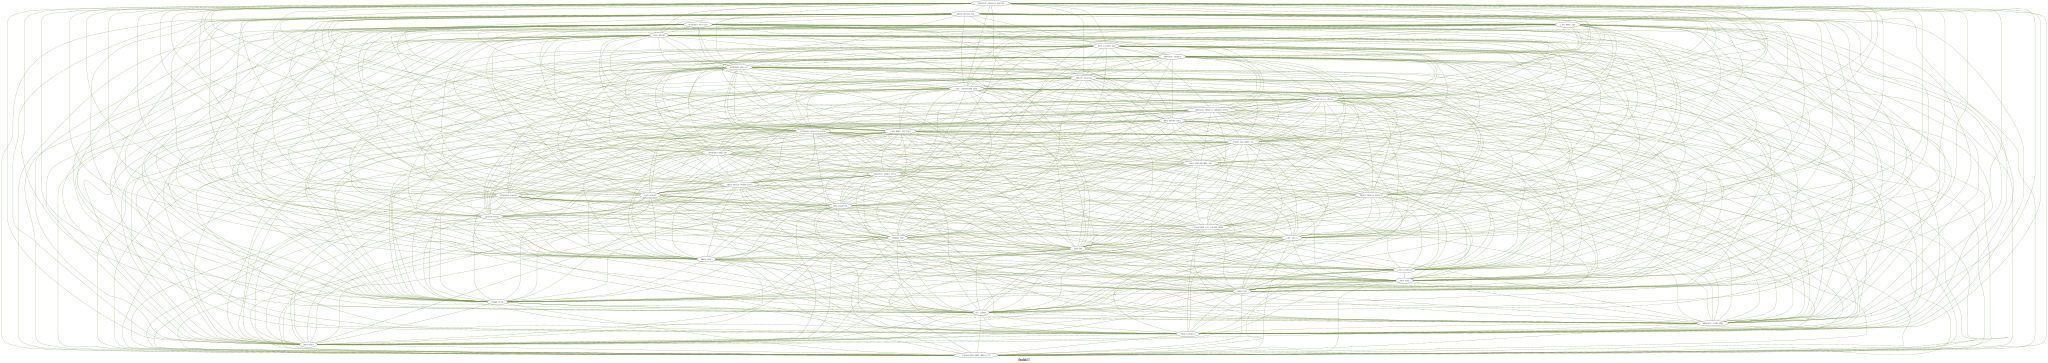

In [31]:
dot